In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = ["/home/syahla/kp/captured_images/captured_frame0.jpg",
            "/home/syahla/kp/captured_images/captured_frame1.jpg",
            "/home/syahla/kp/captured_images/captured_frame2.jpg",
            "/home/syahla/kp/captured_images/captured_frame3.jpg",]

# Load gambar
imgs = []
for path in img_path:
    img = cv2.imread(path)
    if img is None:
        print(f"Could not read: {path}")
        raise Exception("Image loading failed")
    imgs.append(img)
    print(f"Loaded: {path}, Shape: {img.shape}")

print("\n" + "="*50)
print("TRY PANORAMA MODE")
print("="*50)

# Coba 1: Mode PANORAMA (default)
stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
status, stitched = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print(f"Panorama failed with (error code: {status})")
    
    print("\n" + "="*50)
    print("TRY SCANS MODE")
    print("="*50)
    
    # Coba 2: Mode SCANS (untuk dokumen/scan)
    stitcher = cv2.Stitcher_create(cv2.Stitcher_SCANS)
    status, stitched = stitcher.stitch(imgs)
    
    if status != cv2.Stitcher_OK:
        print(f"Scans mode failed with (error code: {status})")
        
        # Error messages
        error_msgs = {
            1: "Butuh lebih banyak gambar dengan overlap yang jelas",
            2: "Gambar tidak overlap cukup ATAU fitur tidak cukup",
            3: "Gagal adjust parameter kamera"
        }
        print(f"\n💡 Saran: {error_msgs.get(status, 'Error tidak dikenal')}")
        print("\n🔍 Tips:")
        print("   - Pastikan gambar overlap minimal 30-40%")
        print("   - Cek pencahayaan gambar tidak terlalu berbeda")
        print("   - Pastikan gambar tidak blur")
        print("   - Coba kurangi jumlah gambar (pakai 2-3 dulu)")
        
        raise Exception("Stitching failed pada kedua mode")

print("Stitching BERHASIL!")

# Tampilkan hasil
result = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(15, 8))
plt.imshow(result)
plt.axis('off')
plt.title("Panorama Result")
plt.tight_layout()
plt.show()

# Simpan hasil
cv2.imwrite("panorama_output.jpg", stitched)
print("\nHasil disimpan: panorama_output.jpg")

✅ Loaded: /home/syahla/kp/captured_images/captured_frame0.jpg, Shape: (480, 640, 3)
✅ Loaded: /home/syahla/kp/captured_images/captured_frame1.jpg, Shape: (480, 640, 3)

MENCOBA MODE PANORAMA
❌ Mode PANORAMA gagal (error code: 1)

MENCOBA MODE SCANS
❌ Mode SCANS juga gagal (error code: 1)

💡 Saran: Butuh lebih banyak gambar dengan overlap yang jelas

🔍 Tips:
   - Pastikan gambar overlap minimal 30-40%
   - Cek pencahayaan gambar tidak terlalu berbeda
   - Pastikan gambar tidak blur
   - Coba kurangi jumlah gambar (pakai 2-3 dulu)


Exception: Stitching failed pada kedua mode

Loaded: 2026-01-06_152717/captured_frame0.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame1.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame10.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame11.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame12.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame13.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame14.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame15.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame16.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame17.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame18.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame19.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame2.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame20.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_fr

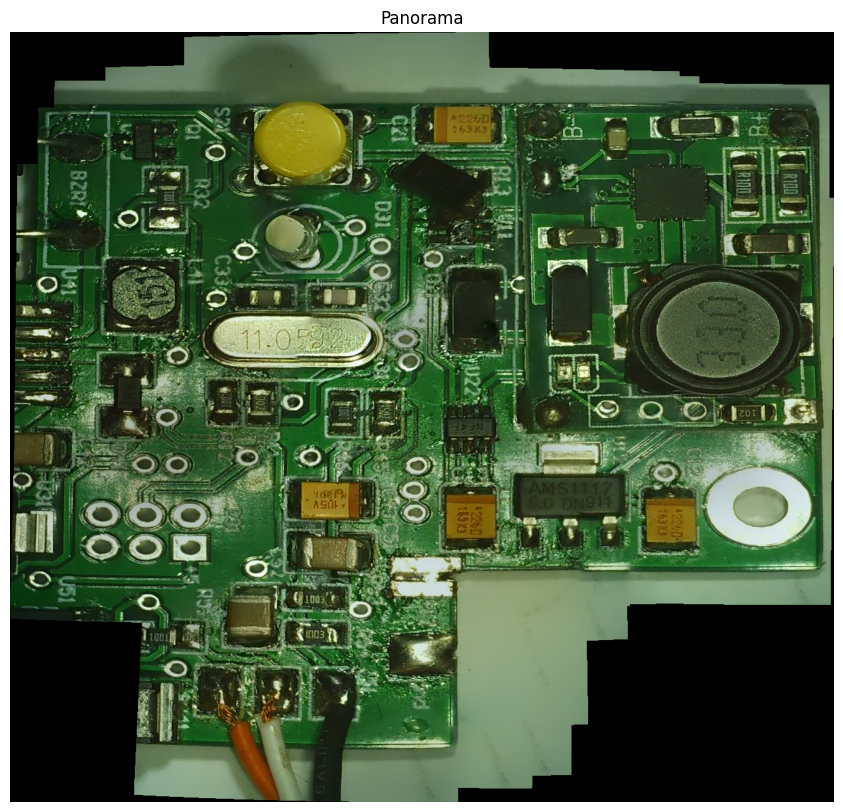

Saved stitched_panorama.jpg


In [24]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from datetime import datetime

folder_path = "2026-01-06_152717"
folder_path = sorted(glob(os.path.join(folder_path, "*.png")))

imgs = []
for i, path in enumerate(folder_path):
    img = cv2.imread(path)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    if img is None:
        print(f"Could not read: {path}")
        raise Exception("Image loading failed")
    imgs.append(img)
    
    print(f"Loaded: {path}, Shape: {img.shape}")

stitcher_pano = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
status_pano, pano = stitcher_pano.stitch(imgs)

if status_pano != cv2.Stitcher_OK:
    print(f"Panorama failed with (error code: {status_pano})")
    print("Stitching failed in PANORAMA mode")
    print("...Try to stitching in scans mode...")
    stitcher_scans = cv2.Stitcher_create(cv2.Stitcher_SCANS)
    status_scans, scans = stitcher_scans.stitch(imgs)

    if status_scans != cv2.Stitcher_OK:
        print(f"Scans mode failed with (error code: {status_scans})")
        print("Stitching failed in SCANS mode")
    else: print("Stitching in SCANS mode successful!")
else: print("Stitching in PANORAMA mode successful!")

#display stitching result if success
if status_pano == cv2.Stitcher_OK:
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
    plt.title("Panorama")
    plt.axis("off")
    plt.show()
    print("Saved stitched_panorama.jpg")
    cv2.imwrite(f"stitched_panorama{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", pano)
elif status_scans == cv2.Stitcher_OK:
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(scans, cv2.COLOR_BGR2RGB))
    plt.title("Scans")
    plt.axis("off")
    plt.show()
    print("Saved stitched_scans.jpg")
    cv2.imwrite(f"stitched_scans{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", scans)

Loaded: 2026-01-06_152717/captured_frame0.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame1.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame10.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame11.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame12.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame13.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame14.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame15.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame16.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame17.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame18.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame19.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame2.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame20.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_fr

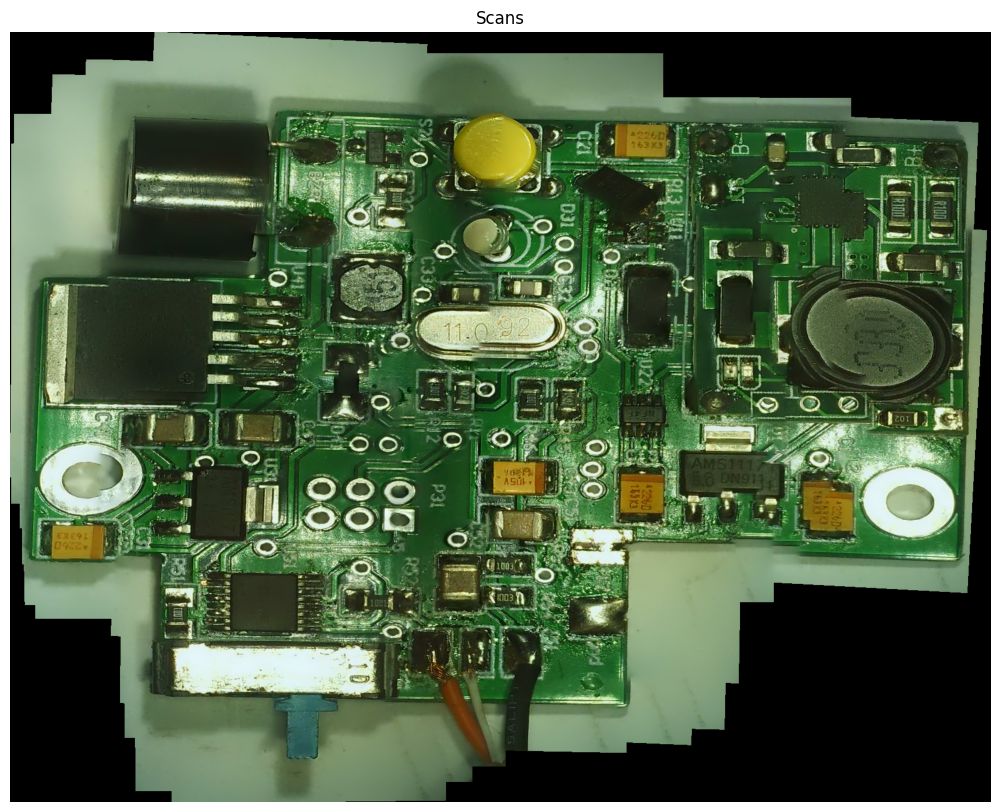

Saved stitched_scans.jpg


True

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from datetime import datetime

folder_path = "2026-01-06_152717"
folder_path = sorted(glob(os.path.join(folder_path, "*.png")))

imgs = []
for i, path in enumerate(folder_path):
    img = cv2.imread(path)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    if img is None:
        print(f"Could not read: {path}")
        raise Exception("Image loading failed")
    imgs.append(img)
    
    print(f"Loaded: {path}, Shape: {img.shape}")

# stitcher_pano = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
# status_pano, pano = stitcher_pano.stitch(imgs)

# if status_pano != cv2.Stitcher_OK:
#     print(f"Panorama failed with (error code: {status_pano})")
#     print("Stitching failed in PANORAMA mode")
#     print("...Try to stitching in scans mode...")
#     stitcher_scans = cv2.Stitcher_create(cv2.Stitcher_SCANS)
#     status_scans, scans = stitcher_scans.stitch(imgs)

#     if status_scans != cv2.Stitcher_OK:
#         print(f"Scans mode failed with (error code: {status_scans})")
#         print("Stitching failed in SCANS mode")
#     else: print("Stitching in SCANS mode successful!")
# else: print("Stitching in PANORAMA mode successful!")

# #display stitching result if success
# if status_pano == cv2.Stitcher_OK:
#     plt.figure(figsize=(15, 10))
#     plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
#     plt.title("Panorama")
#     plt.axis("off")
#     plt.show()
#     print("Saved stitched_panorama.jpg")
#     cv2.imwrite(f"stitched_panorama{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", pano)
stitcher_scans = cv2.Stitcher_create(cv2.Stitcher_SCANS)
status_scans, scans = stitcher_scans.stitch(imgs)

if status_scans != cv2.Stitcher_OK:
    print(f"Scans mode failed with (error code: {status_scans})")
# if status_scans == cv2.Stitcher_OK:
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(scans, cv2.COLOR_BGR2RGB))
plt.title("Scans")
plt.axis("off")
plt.show()
print("Saved stitched_scans.jpg")
cv2.imwrite(f"stitched_scans{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", scans)

Loaded: 2026-01-06_152717/captured_frame0.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame1.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame10.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame11.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame12.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame13.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame14.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame15.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame16.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame17.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame18.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame19.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame2.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_frame20.png, Shape: (640, 480, 3)
Loaded: 2026-01-06_152717/captured_fr

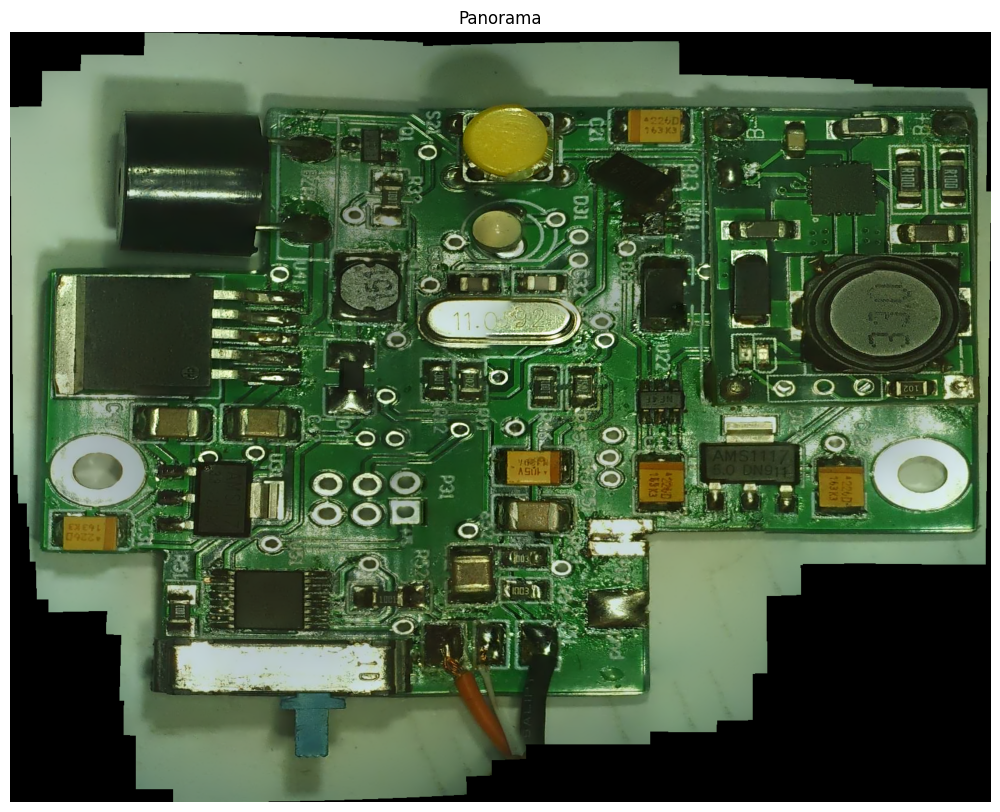

Saved stitched_panorama.jpg


In [3]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from datetime import datetime

folder_path = "2026-01-06_152717"
folder_path = sorted(glob(os.path.join(folder_path, "*.png")))

imgs = []
for i, path in enumerate(folder_path):
    img = cv2.imread(path)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    if img is None:
        print(f"Could not read: {path}")
        raise Exception("Image loading failed")
    imgs.append(img)
    
    print(f"Loaded: {path}, Shape: {img.shape}")

stitcher_pano = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
status_pano, pano = stitcher_pano.stitch(imgs)

if status_pano != cv2.Stitcher_OK:
    print(f"Panorama failed with (error code: {status_pano})")
    print("Stitching failed in PANORAMA mode")
    # print("...Try to stitching in scans mode...")
#     stitcher_scans = cv2.Stitcher_create(cv2.Stitcher_SCANS)
#     status_scans, scans = stitcher_scans.stitch(imgs)

#     if status_scans != cv2.Stitcher_OK:
#         print(f"Scans mode failed with (error code: {status_scans})")
#         print("Stitching failed in SCANS mode")
#     else: print("Stitching in SCANS mode successful!")
# else: print("Stitching in PANORAMA mode successful!")

# #display stitching result if success
if status_pano == cv2.Stitcher_OK:
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
    plt.title("Panorama")
    plt.axis("off")
    plt.show()
    print("Saved stitched_panorama.jpg")
    cv2.imwrite(f"stitched_panorama{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", pano)
# stitcher_scans = cv2.Stitcher_create(cv2.Stitcher_SCANS)
# status_scans, scans = stitcher_scans.stitch(imgs)

# if status_scans != cv2.Stitcher_OK:
#     print(f"Scans mode failed with (error code: {status_scans})")
# # if status_scans == cv2.Stitcher_OK:
# plt.figure(figsize=(15, 10))
# plt.imshow(cv2.cvtColor(scans, cv2.COLOR_BGR2RGB))
# plt.title("Scans")
# plt.axis("off")
# plt.show()
# print("Saved stitched_scans.jpg")
# cv2.imwrite(f"stitched_scans{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.jpg", scans)